Null Hypothesis: That there is no statistically difference between manual Linear Regression and XGboost regression

**Project Summary: GPA Predictor**
Our project is a comprehensive Python script designed to predict student GPA based on various lifestyle factors using machine learning models. The project involves data preprocessing, visualization, confidence intervals, and the application of both linear regression and XGBoost models to predict GPA. Below is a detailed summary of the project's components:
1. **Data Handling and Preprocessing**
The script begins by importing necessary libraries and setting up the environment, including mounting Google Drive to access data files.
It reads a dataset named student_lifestyle_dataset.csv and performs initial data cleaning by dropping irrelevant columns like Student_ID and Stress_Level.

2. **Data Visualization**
The script includes functions to visualize data distributions and relationships between variables using seaborn and matplotlib. This includes plotting histograms, density plots, and pair plots to understand the data better.
3. **Feature Engineering**
The dataset is prepared for modeling by selecting relevant features such as Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, and Physical_Activity_Hours_Per_Day.
4. **Modeling with XGBoost**
An XGBoost model is trained to predict GPA, leveraging its ability to handle non-linear relationships and feature importance analysis.
The model's performance is evaluated using metrics like RMSE, and feature importance is visualized to understand which factors most influence GPA.
5. **Linear Regression Models**
The script implements both a scikit-learn linear regression model and a manual linear regression model to predict GPA.
The manual model involves calculating coefficients using matrix operations, providing a deeper understanding of the linear relationships in the data and leveraging exactly what we learned in class.
6. **Model Evaluation and Comparison**
The performance of the XGBoost and manual linear regression models is compared using statistical tests like the paired t-test to determine if there is a significant difference in their prediction errors.
Residuals from both models are visualized to compare their accuracy and reliability.
7. **Interactive Prediction with Confidence Intervals**
An interactive widget is provided to predict GPA based on user-inputted lifestyle factors, along with a confidence interval for the prediction.
8. **Statistical Analysis**
The script includes hypothesis testing to compare the manual linear model and XGBoost model, testing the null hypothesis that there is no significant difference between the two models.
9. **Conclusion**
The project concludes with a summary of findings, emphasizing the importance of study hours in predicting GPA and the effectiveness of different modeling approaches.
This project provides a comprehensive approach to predicting student performance using machine learning, with a focus on understanding the impact of various lifestyle factors on academic success. We ACCEPT the null hypothesis


In [ ]:
%matplotlib inline
# utils
import os, re, math
import gzip
import struct
import pyarrow
from pathlib import Path
from dataclasses import dataclass

# A library specific to colab for mounting Google Drive folders
from google.colab import drive

# numbers
import numpy as np
import numpy.random as rn
import pandas as pd


# stats
!pip install scikit-learn==1.5.2 # Needed for compatability with xgBoost
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

#sklearn Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# xgBoost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import root_mean_squared_error

# for interactive widget
import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy import stats

# plots
import matplotlib.pyplot as plt
import seaborn as sns
# Import the bokeh python wrappers for javascript plots
#  - a preferred visualization tool
from bokeh.plotting import figure, show, row, save
from bokeh.models import ColumnDataSource, VBar, Span, Text, Label
from bokeh.io import output_notebook, output_file
output_notebook()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
# globals

DATA_DIR = Path('/content/drive/MyDrive/ISE201_fall2024/Anthony Frank/project_data/')


In [ ]:
if not Path('/content/drive/').exists():
  drive.mount('/content/drive/')
os.chdir(DATA_DIR)
os.listdir('.')

Mounted at /content/drive/


['student_lifestyle_dataset.csv']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_student_data= pd.read_csv('student_lifestyle_dataset.csv')
raw_student_data.shape

(2000, 8)

In [ ]:
raw_student_data.head(10)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
5,6,6.0,2.1,8.0,0.3,7.6,2.85,Moderate
6,7,8.0,0.7,5.3,5.7,4.3,3.08,High
7,8,8.4,1.8,5.6,3.0,5.2,3.20,High
8,9,5.2,3.6,6.3,4.0,4.9,2.82,Low
9,10,7.7,0.7,9.8,4.5,1.3,2.76,Moderate


In [ ]:
clean_raw_student_data = raw_student_data.drop(columns=['Student_ID','Stress_Level'])
clean_raw_student_data.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,6.9,3.8,8.7,2.8,1.8,2.99
1,5.3,3.5,8.0,4.2,3.0,2.75
2,5.1,3.9,9.2,1.2,4.6,2.67
3,6.5,2.1,7.2,1.7,6.5,2.88
4,8.1,0.6,6.5,2.2,6.6,3.51


#Visualizing the data

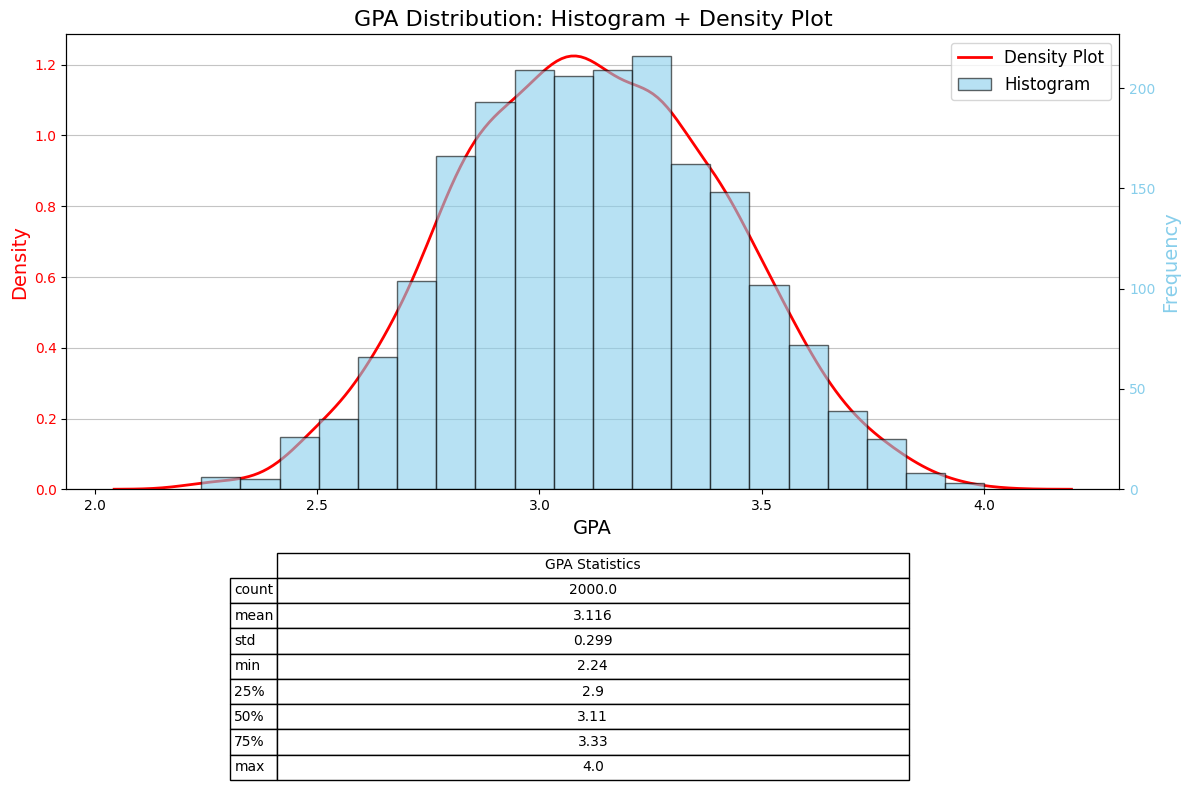

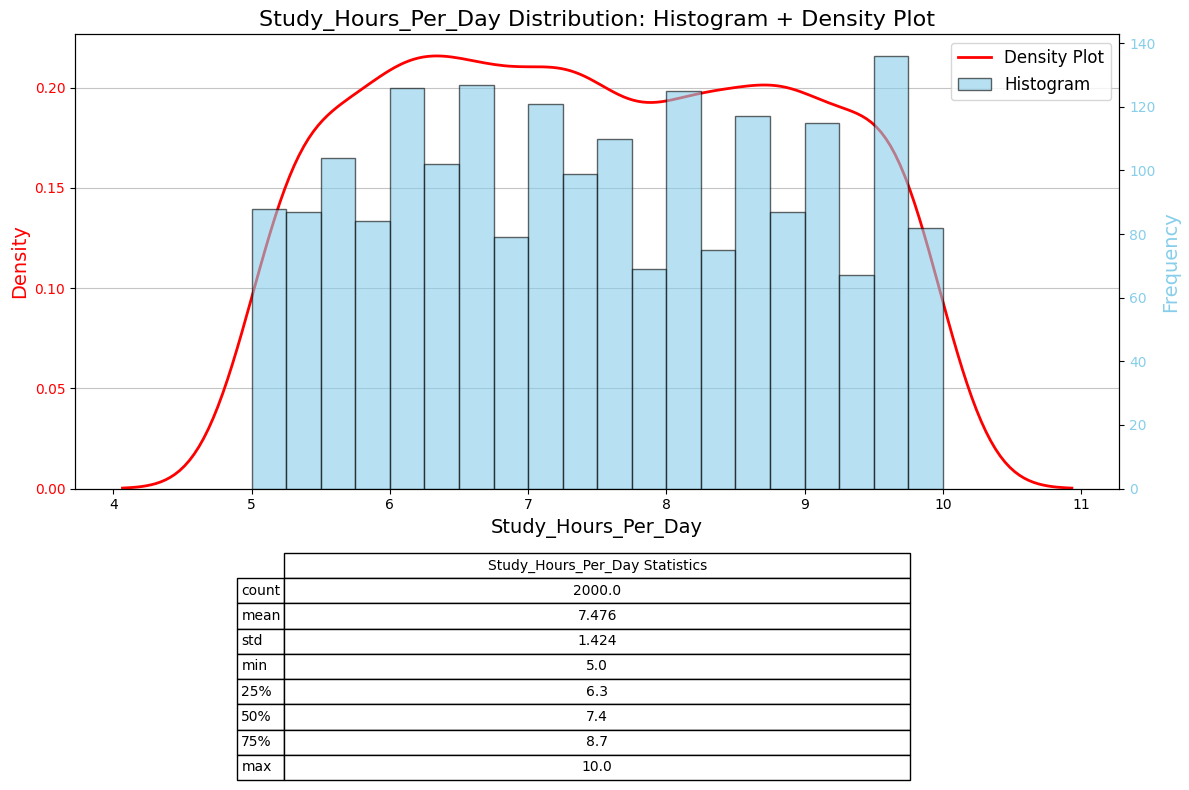

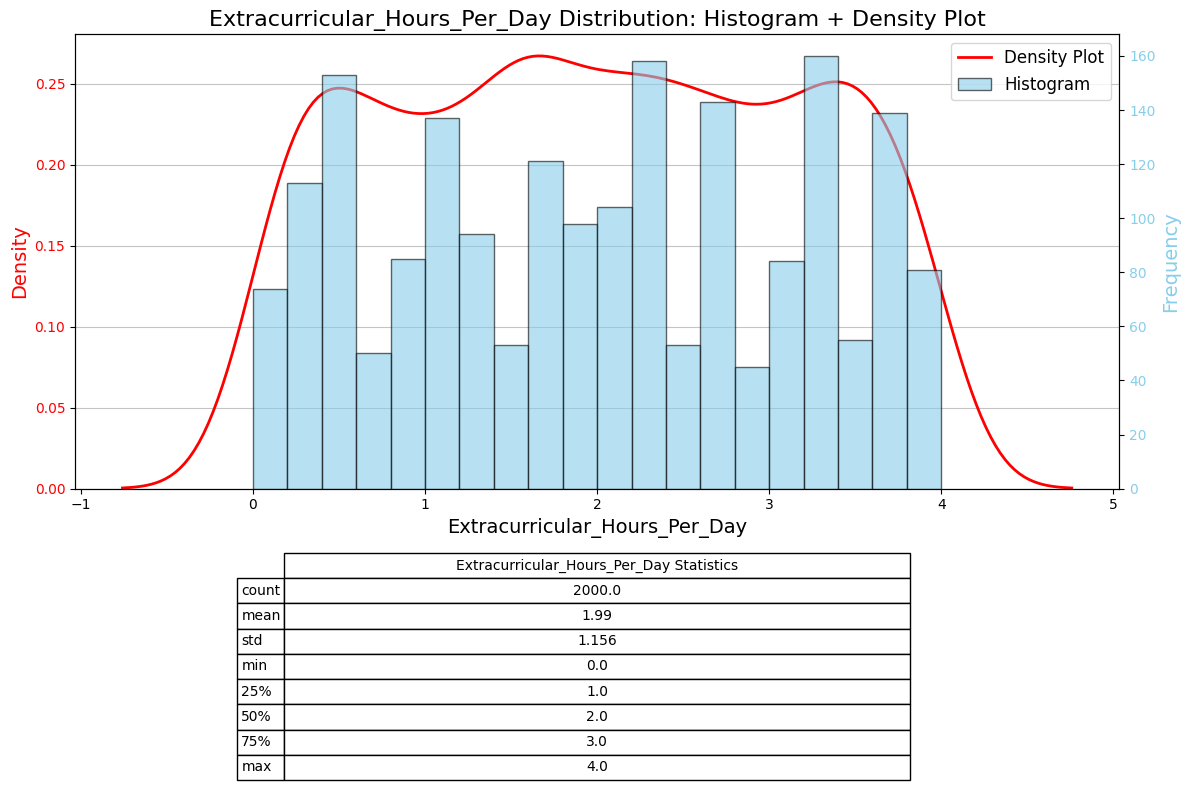

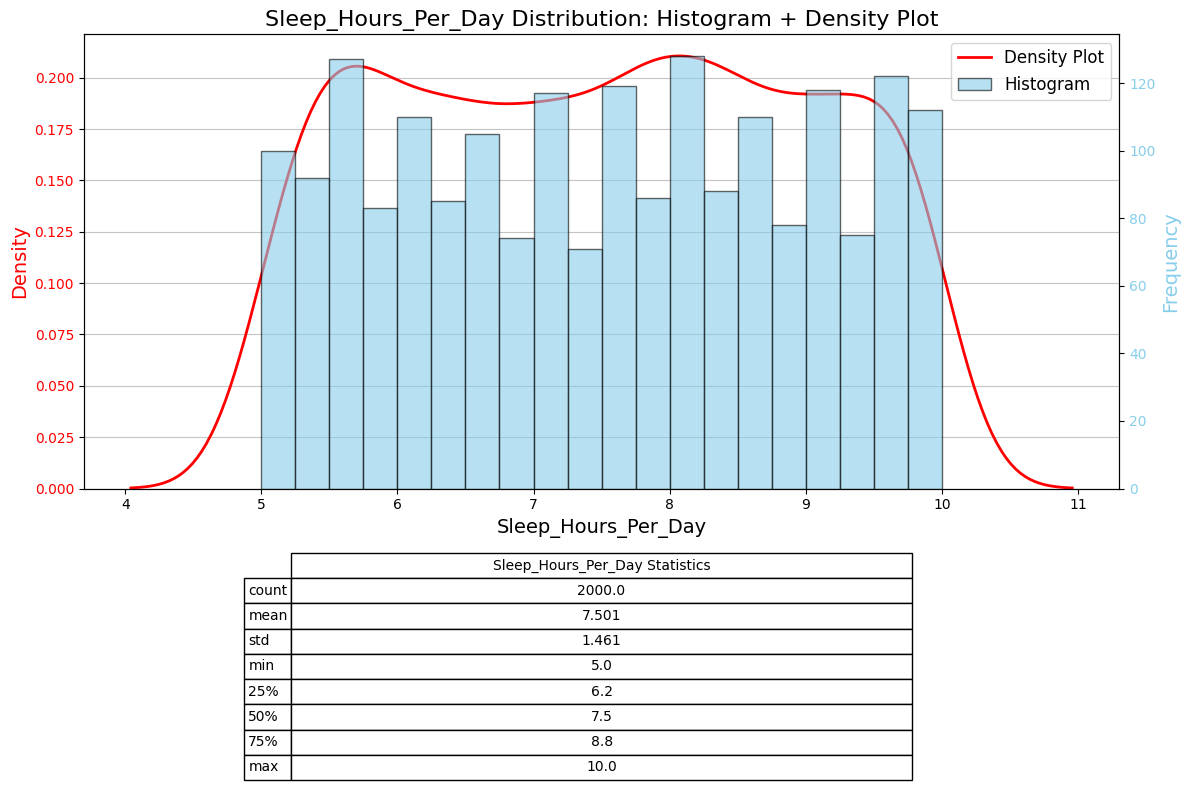

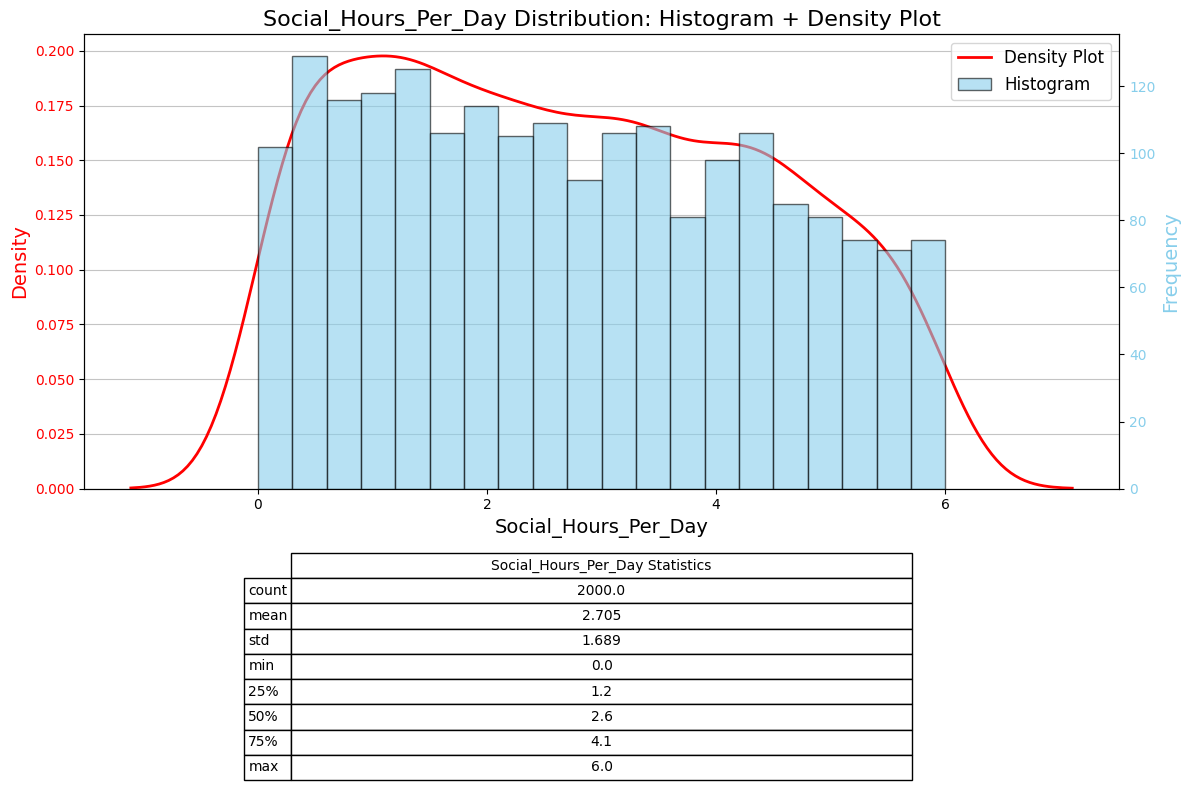

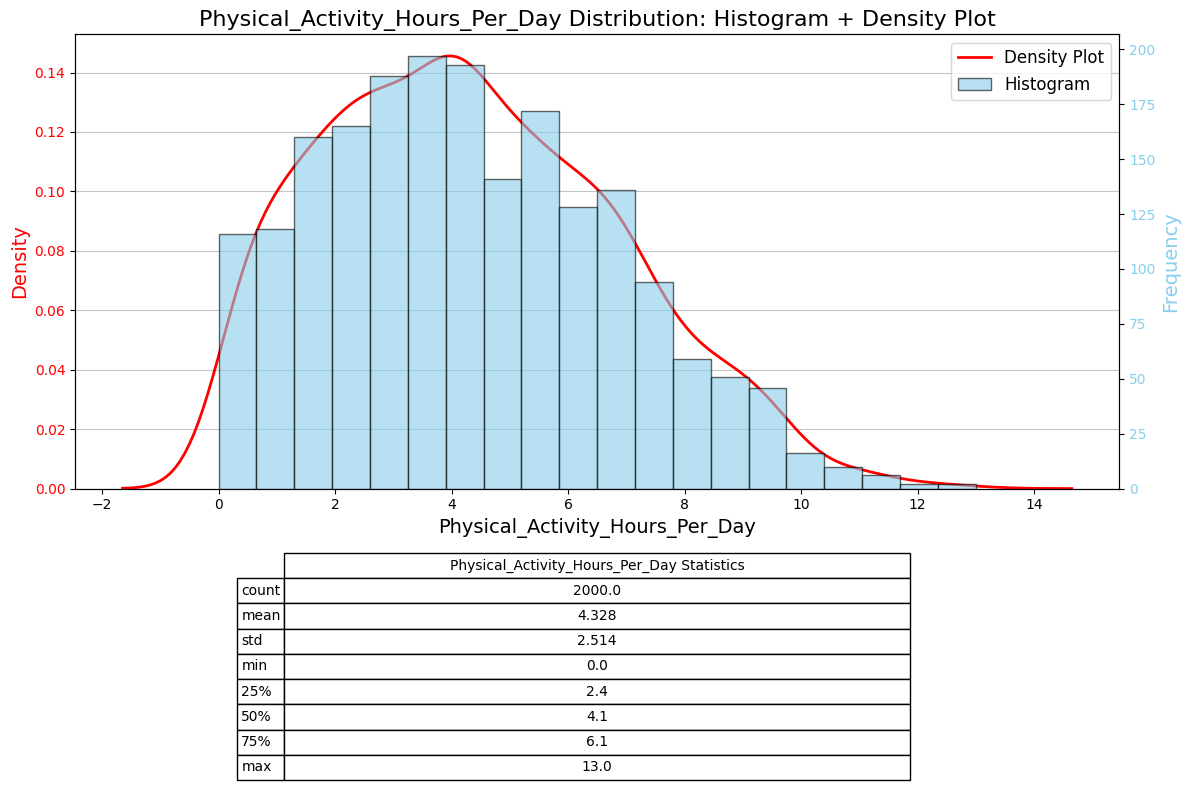

In [ ]:
numeric_df = raw_student_data.drop(columns=['Student_ID'], errors='ignore')

def plotDistributionSimp(columnName):
    # Create figure with gridspec for custom subplot layouts
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])

    # First subplot for distribution
    ax1 = fig.add_subplot(gs[0])
    ax2 = ax1.twinx()

    # Plot density on the left axis (ax1)
    sns.kdeplot(data=numeric_df[columnName], color='red', linewidth=2, label='Density Plot', ax=ax1)

    # Plot histogram on the right axis (ax2)
    counts, bins, _ = ax2.hist(numeric_df[columnName], bins=20, color='skyblue',
                              alpha=0.6, edgecolor='black', label='Histogram')

    # Customize left axis (Density)
    ax1.set_ylabel('Density', fontsize=14, color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Customize right axis (Frequency)
    ax2.set_ylabel('Frequency', fontsize=14, color='skyblue')
    ax2.tick_params(axis='y', labelcolor='skyblue')

    # Add title and x-label
    ax1.set_title(f'{columnName} Distribution: Histogram + Density Plot', fontsize=16)
    ax1.set_xlabel(f'{columnName}', fontsize=14)

    # Add grid (only for left axis)
    ax1.grid(axis='y', alpha=0.75)

    # Add legends for both plots
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=12)

    # Second subplot for descriptive statistics
    ax3 = fig.add_subplot(gs[1])
    ax3.axis('tight')
    ax3.axis('off')

    # Get descriptive statistics
    stats = clean_raw_student_data[columnName].describe()

    # Create table with statistics
    table_data = [[round(stats[i], 3)] for i in stats.index]
    table = ax3.table(cellText=table_data,
                     rowLabels=stats.index,
                     colLabels=[f'{columnName} Statistics'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0.2, 0, 0.6, 1])

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)

    plt.tight_layout()
    plt.show()


gpaColumn = 'GPA'
studyHours = 'Study_Hours_Per_Day'
extracurricularHours = 'Extracurricular_Hours_Per_Day'
sleepHours = 'Sleep_Hours_Per_Day'
socialHours = 'Social_Hours_Per_Day'
physicalActivity = 'Physical_Activity_Hours_Per_Day'
stressLevel = "Stress_Level"

plotDistributionSimp(gpaColumn)
plotDistributionSimp(studyHours)
plotDistributionSimp(extracurricularHours)
plotDistributionSimp(sleepHours)
plotDistributionSimp(socialHours)
plotDistributionSimp(physicalActivity)
# plotDistributionSimp(stressLevel)

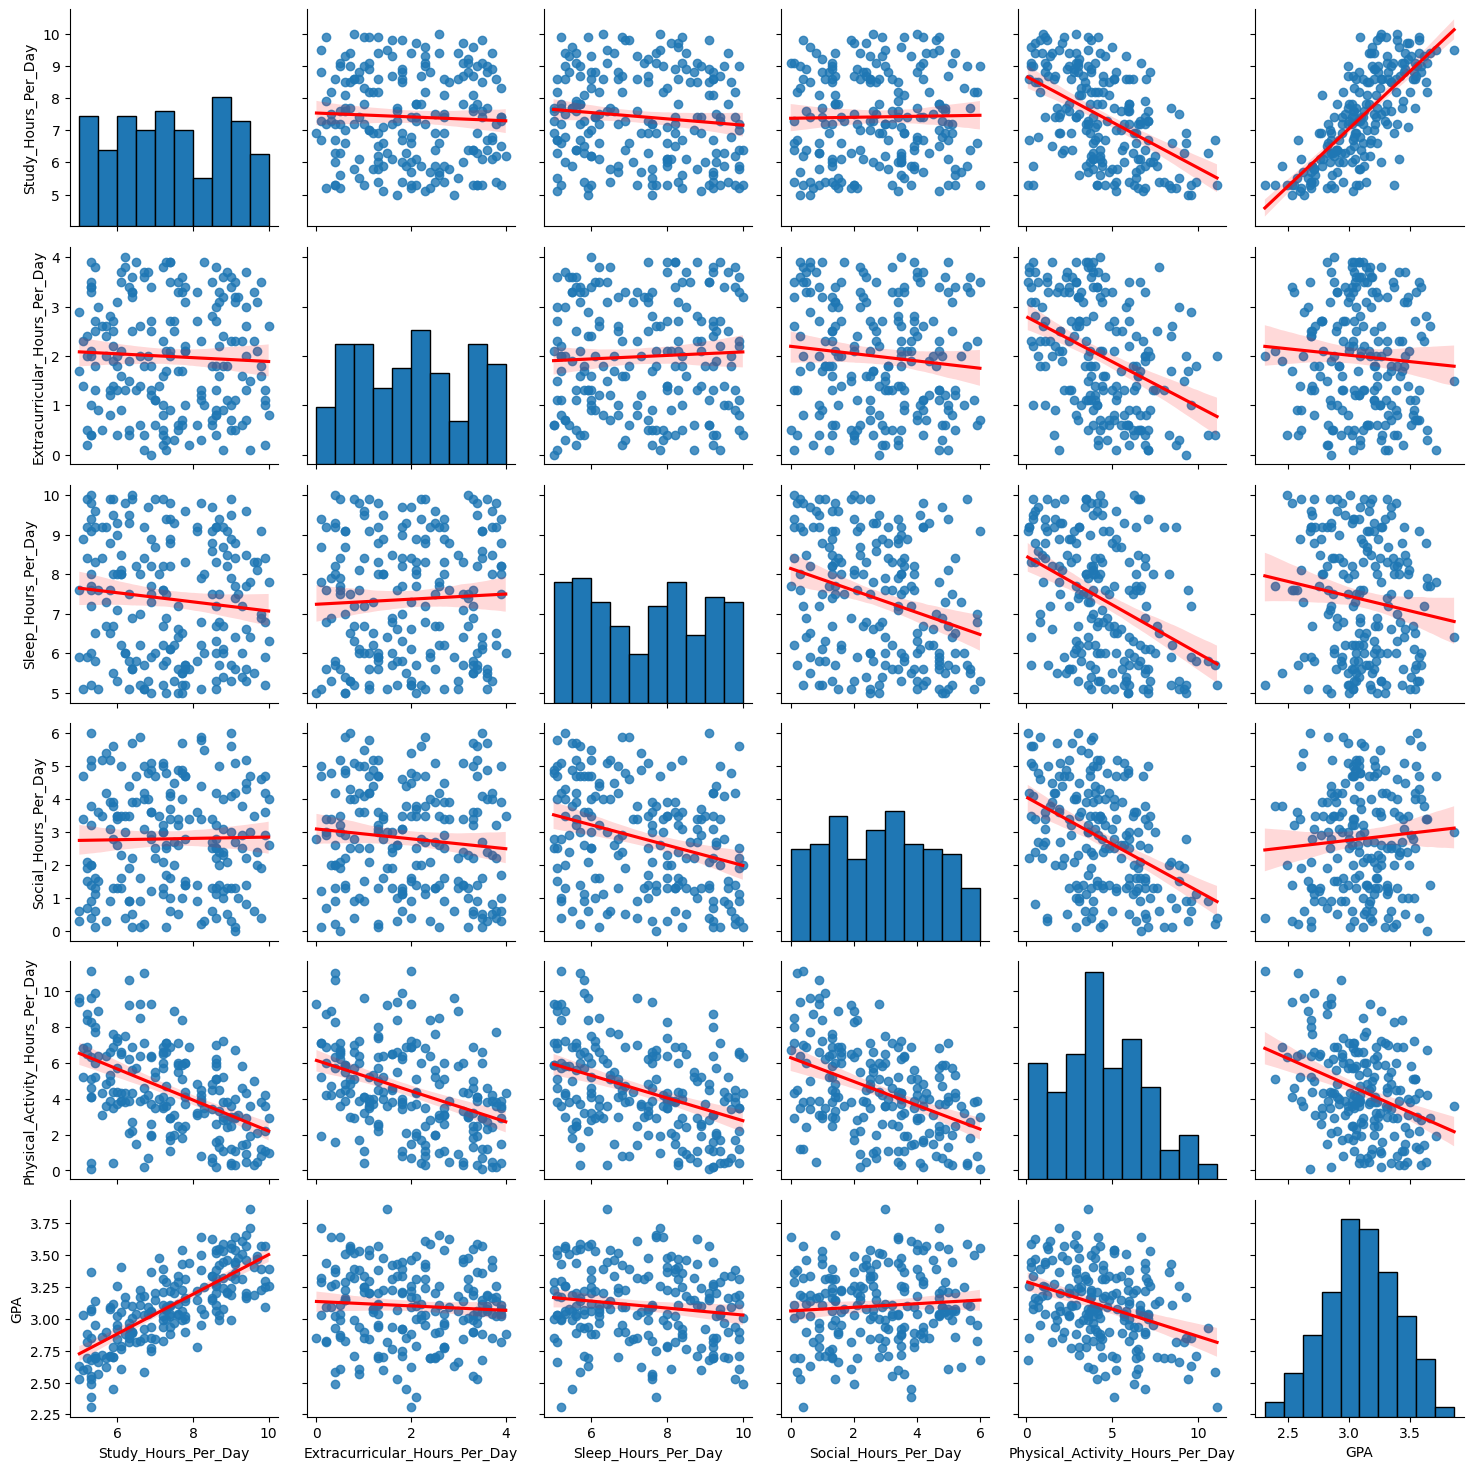

In [ ]:
# Cleaning up pair plots here as per Prof suggestion. Too many datapoints initially
sampled_data = clean_raw_student_data.sample(frac=0.1, random_state=42)  # Random state makes the randomness repeatable between runs

# Create a PairGrid
g = sns.PairGrid(sampled_data)

# Map the plots
g.map_upper(sns.regplot, line_kws={'color': 'red'})  # Scatter plots with red trend lines on the upper triangle
g.map_lower(sns.regplot, line_kws={'color': 'red'})  # Scatter plots with red trend lines on the lower triangle
g.map_diag(plt.hist,edgecolor='black')               # Histograms on the diagonal

plt.show()

<Axes: >

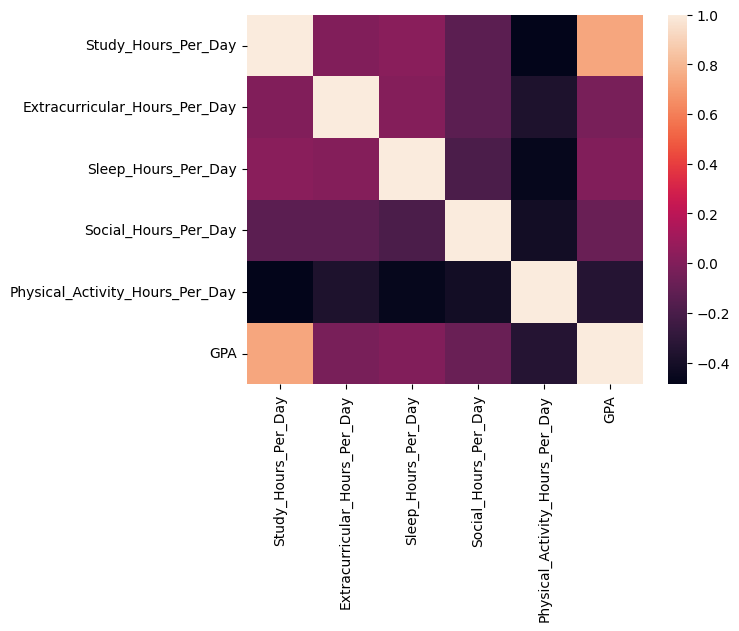

In [ ]:
sns.heatmap(clean_raw_student_data.corr())

# **XGBoost-Extreme Gradient Boosting**


 XGBoost to examine feature importance, to see which activities have the strongest relationship to GPA.

 - Non-Linear Relationships:
    XGBoost uses decision tree ensembles that naturally capture non-linear patterns and interactions among features.

- Feature Importance:
    After training an XGBoost model, we can examine feature importance to see which activities have the strongest relationship to GPA.

- Handles Missing Data:

- Scalability and Efficiency:
    XGBoost is optimized for speed and memory usage, allowing us to train models quickly and handle big datasets efficiently.

- Robust Baseline For Tabular Data.

In [ ]:
# Input
X = clean_raw_student_data[['Study_Hours_Per_Day',
        'Extracurricular_Hours_Per_Day',
        'Sleep_Hours_Per_Day',
        'Social_Hours_Per_Day',
        'Physical_Activity_Hours_Per_Day']]

#Output/target - GPA
y = clean_raw_student_data['GPA']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
X_train.shape

(1600, 5)

# **Most important feature/activity for predicting student performance**

- Study Hours Per Day
  - Importance: 0.66
  - This feature has the highest importance score, suggesting that among the factors considered, the amount of time spent studying per day has the greatest influence on predicting GPA. In other words, the model relies heavily on study hours to differentiate between different GPA values.



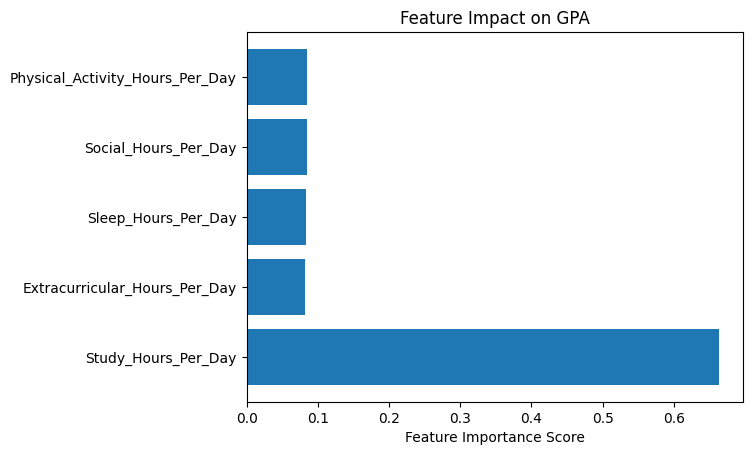

In [ ]:

# Plot feature importances
feature_importances = model.feature_importances_
features = X_train.columns

plt.barh(features, feature_importances)
plt.xlabel("Feature Importance Score")
plt.title("Feature Impact on GPA")
plt.show()


In [ ]:
# @title Feature importance values
importances = model.feature_importances_

# Feature names and their importance scores
for name, score in zip(X.columns, importances):
    print(f"Feature: {name}, \n Importance: {score}")

Feature: Study_Hours_Per_Day, 
 Importance: 0.6634130477905273
Feature: Extracurricular_Hours_Per_Day, 
 Importance: 0.08257553726434708
Feature: Sleep_Hours_Per_Day, 
 Importance: 0.08401861786842346
Feature: Social_Hours_Per_Day, 
 Importance: 0.08545123785734177
Feature: Physical_Activity_Hours_Per_Day, 
 Importance: 0.08454157412052155


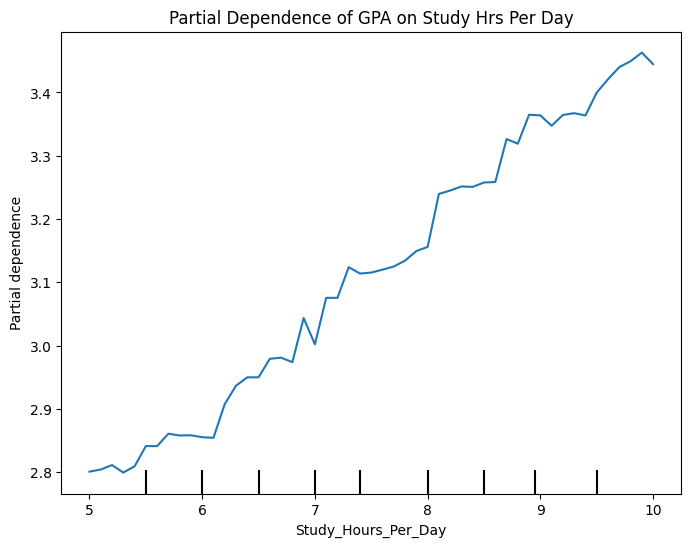

In [ ]:
# @title Partial Dependence Plots To show whether increasing study hours continuously improves GPA predictions.

fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X, ['Study_Hours_Per_Day'], ax=ax)
plt.title('Partial Dependence of GPA on Study Hrs Per Day')
plt.show()


In [ ]:
# @title Prediction on test set
y_pred = model.predict(X_test)

In [ ]:
# @title RMSE as the primary evaluation metric because it aligns closely with minimizing large prediction errors.

rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE Score:", rmse)

RMSE Score: 0.22696128581566258


In [ ]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.051511425259098874
R-squared: 0.4482686294671454


# Linear Regression Using SciKit-Learn
- to predict GPA, using features except student ID and GPA
- This leads to Mean Squared Error: 0.04207
- R-squared: 0.5494
# Steps for Linear Regression
- load the data
- fit the model
- evaluate the mean squared error of the model

In [ ]:
# load the data
# drive.mount('/content/drive', force_remount=True)
# file_path = '/content/drive/My Drive/project 1/student_lifestyle_dataset.csv' # Replace with your actual file path
# data = pd.read_csv(file_path)
data = raw_student_data.copy()

# splitting the data
stress_levels = {"Low": 1, "Moderate": 2, "High": 3}
for i in range(len(data["Stress_Level"])):
    data.loc[i, "Stress_Level"] = stress_levels[data["Stress_Level"][i]]
X = data.drop(["Student_ID", "GPA"], axis=1)    # Features
y = data['GPA']                                 # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# printing the data
print('\nNumber of rows and columns in the data set: ', data.shape)
print('\nNumber of rows and columns in the training data set: ', X_train.shape)
data.head()


Number of rows and columns in the data set:  (2000, 8)

Number of rows and columns in the training data set:  (1600, 6)


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,2
1,2,5.3,3.5,8.0,4.2,3.0,2.75,1
2,3,5.1,3.9,9.2,1.2,4.6,2.67,1
3,4,6.5,2.1,7.2,1.7,6.5,2.88,2
4,5,8.1,0.6,6.5,2.2,6.6,3.51,3


In [ ]:
# initialize, train, and predict with the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)   # The model gets trained here
y_pred = model.predict(X_test)

# print out the slopes for each attribute
print(model.coef_)
print(model.intercept_) # The constant, like in y = mx + B

[ 0.1246901  -0.03816343 -0.03106752 -0.02747106 -0.02798808  0.00271835]
2.6811183974900366


In [ ]:
# evaluate the model
rmse = root_mean_squared_error(y_test, y_pred) # The smaller the better
mse = mean_squared_error(y_test, y_pred)       # The smaller the better
r2 = r2_score(y_test, y_pred)

# print the evaluation results
print("RMSE Score:", rmse)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

RMSE Score: 0.2051100788534408
Mean Squared Error: 0.0420701444472647
R-squared: 0.5493928126109363


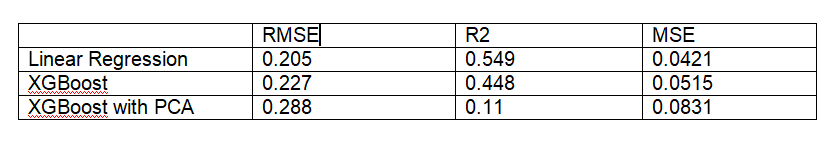

In [ ]:
# represents study, extracurricular, sleep, social, physical activity, and stress level
example_student = {
    "Study_Hours_Per_Day":              [10],
    "Extracurricular_Hours_Per_Day":    [2],
    "Sleep_Hours_Per_Day":              [8],
    "Social_Hours_Per_Day":             [3],
    "Physical_Activity_Hours_Per_Day":  [1],
    "Stress_Level":                     [1],
}
X_single = pd.DataFrame(example_student)
y_pred_single = model.predict(X_single)
print(y_pred_single)

[3.49546942]


Does Student ID have an impact?
The goal here is to show there is no impact on GPA

In [ ]:
# only train on student ID to GPA
X_student_id = pd.DataFrame({"Student_ID": data["Student_ID"]})
y_student_id = data['GPA']
X_train, X_test, y_train, y_test = train_test_split(X_student_id, y_student_id, test_size=0.2, random_state=42)

# Create a new Linear Regression model instead of using the XGBoost model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Now you can access coef_ and intercept_ from the linear model
print("model slopes:", model_linear.coef_)
print("line intercept:", model_linear.intercept_)

# printing mean GPA, nearly identical to intercept
GPA_mean = data['GPA'].mean()
print("GPA mean:", GPA_mean)

# Continue with the rest of your code using model_linear for predictions and evaluation
y_pred = model_linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (just for using student id): {mse}\n r2: {r2}")

# case in point
X_student1 = pd.DataFrame({"Student_ID": [1]})
y_hat_student1 = model_linear.predict(X_student1)
y_student1 = data['GPA'][1]
print("student ID 1 GPA:", y_hat_student1, y_student1)
X_student10000 = pd.DataFrame({"Student_ID": [10000]})
y_student10000 = model_linear.predict(X_student10000)
print("student ID 10000 GPA:", y_student10000)

model slopes: [-2.95395132e-06]
line intercept: 3.1199274527345104
GPA mean: 3.11596
Mean Squared Error (just for using student id): 0.09344283848634528
 r2: -0.0008526280379870244
student ID 1 GPA: [3.1199245] 2.75
student ID 10000 GPA: [3.09038794]


#Manual Linear Regression

In [ ]:
X = data.drop(["Student_ID", "GPA"], axis=1)                                              # Dropping Student_ID and GPA, axis=1 means columns, not rows
X["Stress_Level"]=X["Stress_Level"].astype('float64')
y = data['GPA']                                                                           # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% for testing, 80% for training.

In [ ]:
X_train

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level
968,9.7,3.7,7.5,1.0,2.1,3.0
240,6.3,3.2,6.6,2.7,5.2,2.0
819,6.0,0.2,7.8,3.6,6.4,2.0
692,7.8,3.4,9.0,0.7,3.1,2.0
420,8.8,3.2,5.1,5.8,1.1,3.0
...,...,...,...,...,...,...
1130,5.5,3.9,5.9,3.9,4.8,3.0
1294,9.3,2.2,9.1,1.0,2.4,3.0
860,8.0,2.1,6.4,0.0,7.5,2.0
1459,8.6,2.7,7.4,3.4,1.9,3.0


In [ ]:
y_train

,GPA
968,3.04
240,2.85
819,2.75
692,2.95
420,3.13
...,...
1130,2.99
1294,3.07
860,2.83
1459,3.45


In [ ]:
X_train_T = X_train.T # Transpose the training data
X_train_T

,968,240,819,692,420,1085,1998,365,1022,1240,...,121,1638,1044,1724,1095,1130,1294,860,1459,1126
Study_Hours_Per_Day,9.7,6.3,6.0,7.8,8.8,9.6,8.1,9.0,7.7,7.4,...,5.6,7.3,8.9,9.3,8.4,5.5,9.3,8.0,8.6,8.2
Extracurricular_Hours_Per_Day,3.7,3.2,0.2,3.4,3.2,0.8,0.7,0.4,1.6,0.0,...,3.6,1.6,3.4,0.9,2.7,3.9,2.2,2.1,2.7,2.2
Sleep_Hours_Per_Day,7.5,6.6,7.8,9.0,5.1,5.7,7.6,7.9,5.8,5.4,...,8.0,8.4,9.2,6.1,8.1,5.9,9.1,6.4,7.4,5.6
Social_Hours_Per_Day,1.0,2.7,3.6,0.7,5.8,4.6,3.5,2.9,5.9,4.8,...,4.1,1.5,0.9,1.2,1.3,3.9,1.0,0.0,3.4,2.3
Physical_Activity_Hours_Per_Day,2.1,5.2,6.4,3.1,1.1,3.3,4.1,3.8,3.0,6.4,...,2.7,5.2,1.6,6.5,3.5,4.8,2.4,7.5,1.9,5.7
Stress_Level,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0


In [ ]:
# For the manual linear regression, we need to calculate the coefficients.
# We use the formula: B = (X_train_T @ X_train)^-1 @ X_train_T @ y_train

B = np.linalg.inv(X_train_T @ X_train) @ X_train_T @ y_train # Calculate the coefficients. The @ operator is used for matrix multiplication.
B.index = X.columns                                          # Set the index to the column names
B.rename(index='coeff', inplace=True)                        # Rename the index to 'coeff'
B

,coeff
Study_Hours_Per_Day,0.236403
Extracurricular_Hours_Per_Day,0.073550
Sleep_Hours_Per_Day,0.080646
Social_Hours_Per_Day,0.084242
Physical_Activity_Hours_Per_Day,0.083725
Stress_Level,0.002718


In [ ]:
y_pred = X_test @ B                                          # Predict the GPA
y_pred.rename(index='Our_GPA_predicted',inplace=True)        # Rename the index to 'Our_GPA_predicted'

,Our_GPA_predicted
1860,2.904077
353,2.862947
1333,3.436117
905,3.086718
1289,3.324700
...,...
965,3.104262
1284,3.468189
1739,3.329226
261,3.073677


In [ ]:
mse = mean_squared_error(y_test, y_pred)       # Calculate the mean squared error
rmse = root_mean_squared_error(y_test, y_pred) # Calculate the root mean squared error
r2 = r2_score(y_test, y_pred)                  # Calculate the R-squared score
print(f"mse:{mse}")
print(f"rmse:{rmse}")
print(f"r2_score:{r2}")

mse:0.04207014444726475
rmse:0.2051100788534409
r2_score:0.5493928126109358


**Prediction Function with Confidence interval**

In [ ]:
def predict_with_confidence_interactive():
    # Create sliders for each input variable
    study_hours_slider = widgets.FloatSlider(            value=5,    min=0,   max=10,   step=1,    description='Study Hours:')
    extracurricular_hours_slider = widgets.FloatSlider(  value=2,    min=0,   max=4,    step=1,    description='Extracurricular:')
    sleep_hours_slider = widgets.FloatSlider(            value=7,    min=0,   max=10,   step=1,    description='Sleep Hours:')
    social_hours_slider = widgets.FloatSlider(           value=3,    min=0,   max=6,    step=1,    description='Social Hours:')
    physical_activity_hours_slider = widgets.FloatSlider(value=1,    min=0,   max=13,   step=1,    description='Physical Activity:')
    stress_level_slider = widgets.FloatSlider(           value=2,    min=1,   max=3,    step=1,    description='Stress Level:')
    confidence_level_slider = widgets.FloatSlider(       value=0.95, min=0.8, max=0.99, step=0.01, description='Confidence Level:')

    # Display the sliders
    display(study_hours_slider, extracurricular_hours_slider, sleep_hours_slider,
            social_hours_slider, physical_activity_hours_slider, stress_level_slider, confidence_level_slider)

    # Function to update prediction based on slider values
    def update_prediction(change):
        # Clear previous output
        clear_output(wait=True)

        # Display sliders again
        display(study_hours_slider, extracurricular_hours_slider, sleep_hours_slider,
                social_hours_slider, physical_activity_hours_slider, stress_level_slider, confidence_level_slider)

        # Create a DataFrame for the input
        input_data = pd.DataFrame({
            "Study_Hours_Per_Day":             [study_hours_slider.value],
            "Extracurricular_Hours_Per_Day":   [extracurricular_hours_slider.value],
            "Sleep_Hours_Per_Day":             [sleep_hours_slider.value],
            "Social_Hours_Per_Day":            [social_hours_slider.value],
            "Physical_Activity_Hours_Per_Day": [physical_activity_hours_slider.value],
            "Stress_Level":                    [stress_level_slider.value]
        })

        # Convert to numpy array for matrix operations
        input_data_np = input_data.values
        input_data_T_np = input_data_np.T

        # Predict GPA
        y_pred = input_data @ B

        # Calculate standard error of the prediction
        residual_var = mse  # Mean squared error as an estimate of variance
        standard_error = np.sqrt(residual_var * (input_data_np @ np.linalg.inv(X_train_T @ X_train) @ input_data_T_np)[0, 0])

        # Calculate confidence interval
        confidence_level = confidence_level_slider.value
        degrees_of_freedom = len(X_train) - len(B)
        t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
        margin_of_error = t_value * standard_error

        # Confidence interval
        lower_bound = y_pred - margin_of_error
        upper_bound = y_pred + margin_of_error

        print(f"Predicted GPA: {y_pred.values[0]:.2f}")
        print(f"{confidence_level * 100}% Confidence Interval: ({lower_bound.values[0]:.2f}, {upper_bound.values[0]:.2f})")

    # Attach the update function to slider changes
    for slider in [study_hours_slider, extracurricular_hours_slider, sleep_hours_slider,
                   social_hours_slider, physical_activity_hours_slider, stress_level_slider, confidence_level_slider]:
        slider.observe(update_prediction, names='value')

# Call the function to display the sliders and make predictions
predict_with_confidence_interactive()


FloatSlider(value=10.0, description='Study Hours:', max=10.0, step=1.0)

FloatSlider(value=4.0, description='Extracurricular:', max=4.0, step=1.0)

FloatSlider(value=7.0, description='Sleep Hours:', max=10.0, step=1.0)

FloatSlider(value=4.0, description='Social Hours:', max=6.0, step=1.0)

FloatSlider(value=1.0, description='Physical Activity:', max=13.0, step=1.0)

FloatSlider(value=2.0, description='Stress Level:', max=3.0, min=1.0, step=1.0)

FloatSlider(value=0.95, description='Confidence Level:', max=0.99, min=0.8, step=0.01)

Predicted GPA: 3.65
95.0% Confidence Interval: (3.61, 3.69)


In [ ]:
# XGBoost model. Objective is to minimize the squared error. n_estimators is the number of trees in the forest.
# learning_rate is the step size shrinkage used to prevent overfitting. random_state is the random seed for reproducibility.

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42) # Essentially model settings
model.fit(X_train, y_train)                                                                                  # Actually training the model
xgboost_pred =  pd.DataFrame(model.predict(X_test)).rename(mapper={0:'XGBoost_GPA_Predicted'}, axis=1)       # Predict the GPA
xgboost_pred.index = y_pred.index                                                                            # Set the index to the test data index
xgboost_pred

,XGBoost_GPA_Predicted
1860,2.897464
353,2.978155
1333,3.480419
905,3.042483
1289,3.459449
...,...
965,3.120507
1284,3.488765
1739,3.393921
261,3.137302


In [ ]:
actual_vs_predicted = pd.DataFrame(data=[y_test, y_pred, xgboost_pred['XGBoost_GPA_Predicted']]).T
actual_vs_predicted

,GPA,Our_GPA_predicted,XGBoost_GPA_Predicted
1860,2.88,2.904077,2.897464
353,3.12,2.862947,2.978155
1333,3.41,3.436117,3.480419
905,3.11,3.086718,3.042483
1289,3.19,3.324700,3.459449
...,...,...,...
965,3.44,3.104262,3.120507
1284,3.67,3.468189,3.488765
1739,3.37,3.329226,3.393921
261,3.01,3.073677,3.137302


In [ ]:
model_sample_mean = actual_vs_predicted['Our_GPA_predicted'].mean()       # Calculate the mean of the model's predictions
xgboost_sample_mean = actual_vs_predicted['XGBoost_GPA_Predicted'].mean() # Calculate the mean of the XGBoost predictions
model_sample_mean, xgboost_sample_mean

(3.1084564033814646, 3.111543737053871)

In [ ]:
# Calculate residuals
manual_residuals = y_test - y_pred
xgboost_residuals = y_test - xgboost_pred['XGBoost_GPA_Predicted']

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(manual_residuals, xgboost_residuals)

print("results of the t-test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The difference in prediction errors is statistically significant.")
else:
    print("The difference in prediction errors is not statistically significant.")

results of the t-test:
T-statistic: 0.7418148253380464
P-value: 0.4586359579667032
The difference in prediction errors is not statistically significant.


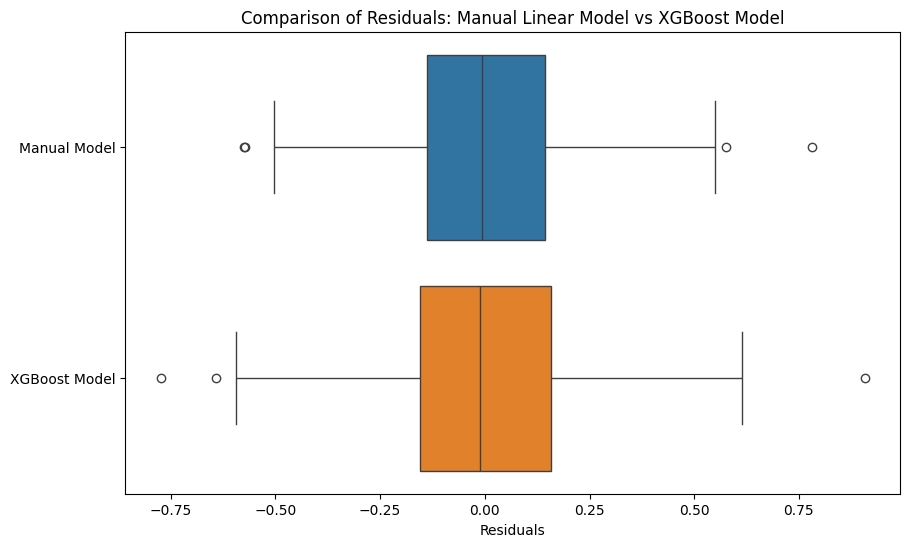

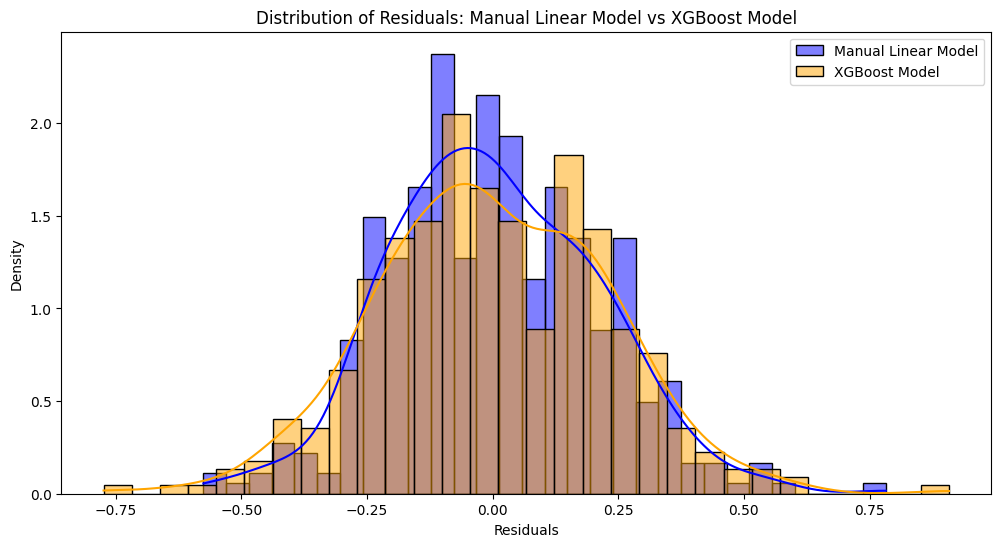

In [ ]:
residuals_df = pd.DataFrame({
    'Manual Model': manual_residuals,
    'XGBoost Model': xgboost_residuals
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df, orient='h')
plt.title('Comparison of Residuals: Manual Linear Model vs XGBoost Model')
plt.xlabel('Residuals')
plt.show()

plt.figure(figsize=(12, 6))

# Plot histogram for manual model residuals
sns.histplot(manual_residuals, color='blue', label='Manual Linear Model', kde=True, stat="density", bins=30, alpha=0.5)

# Plot histogram for XGBoost model residuals
sns.histplot(xgboost_residuals, color='orange', label='XGBoost Model', kde=True, stat="density", bins=30, alpha=0.5)

plt.title('Distribution of Residuals: Manual Linear Model vs XGBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()